In [3]:
! git clone https://github.com/kendreaditya/ECG_DATA.git

Cloning into 'ECG_DATA'...
remote: Enumerating objects: 22, done.
remote: Total 22 (delta 0), reused 0 (delta 0), pack-reused 22
Unpacking objects: 100% (22/22), done.
Checking out files: 100% (9/9), done.


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
from scipy import signal
from tqdm import tqdm
import torch

if torch.cuda.is_available():
  device = torch.device("cuda:0")
  print("Running on GPU -", device )
else:
  device = torch.device("cpu")
  print("Running on CPU -", device )

# to run on gpu .to(device)

Running on GPU - cuda:0


Data from github
180


'\nfor ecgFile in tqdm(trainingData):\n  #ZOOM OUT\n  rnd = (np.random.randint(40)*2)+100\n  ecg = [0] * int((180-rnd)/2)\n  for x in signal.resample(ecgFile[0], rnd):\n    ecg.append(x)\n  for _ in range(int((180-rnd)/2)):\n    ecg.append(0)\n\n  trainingData.append([ecg, ecgFile[1]])\n  \n  #ZOOM IN\n  ecg = []\n  rnd = (np.random.randint(32)*2)+180\n  diff_ecg = signal.resample(ecgFile[0], rnd)\n  p1_ecg = diff_ecg[:len(diff_ecg/2)]\n  p1_ecg = p1_ecg[-90:]\n  p2_ecg = diff_ecg[len(diff_ecg/2):]\n  p2_ecg = p1_ecg[:91]\n  for x in p1_ecg:\n    ecg.append(x)\n  for x in p2_ecg:\n    ecg.append(x)\n\n  ecg = np.asarray(ecg)\n  ecg = ecg / np.amax(abs(ecg))  #ecg.append(signal.resample(ecgFile[0], rnd))\n\n  trainingData.append([ecg, ecgFile[1]])\n'

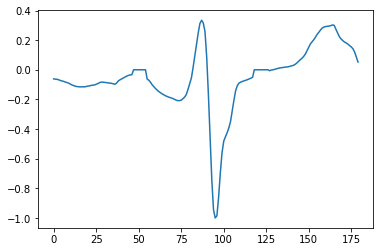

In [6]:

try:
  trainingData = list(np.load("ECG_DATA/trainingData.npy", allow_pickle=True))
  print("Data from github")
except:
  trainingData = np.load("drive/My Drive/trainingData.npy", allow_pickle=True)
  print("Data from google dive")
ecg = trainingData[0][0]
print(len(ecg))
plt.plot(ecg)
'''
for ecgFile in tqdm(trainingData):
  #ZOOM OUT
  rnd = (np.random.randint(40)*2)+100
  ecg = [0] * int((180-rnd)/2)
  for x in signal.resample(ecgFile[0], rnd):
    ecg.append(x)
  for _ in range(int((180-rnd)/2)):
    ecg.append(0)

  trainingData.append([ecg, ecgFile[1]])
  
  #ZOOM IN
  ecg = []
  rnd = (np.random.randint(32)*2)+180
  diff_ecg = signal.resample(ecgFile[0], rnd)
  p1_ecg = diff_ecg[:len(diff_ecg/2)]
  p1_ecg = p1_ecg[-90:]
  p2_ecg = diff_ecg[len(diff_ecg/2):]
  p2_ecg = p1_ecg[:91]
  for x in p1_ecg:
    ecg.append(x)
  for x in p2_ecg:
    ecg.append(x)

  ecg = np.asarray(ecg)
  ecg = ecg / np.amax(abs(ecg))  #ecg.append(signal.resample(ecgFile[0], rnd))

  trainingData.append([ecg, ecgFile[1]])
'''

[-0.28374233 -0.28374233 -0.28220859 -0.28220859 -0.28067485 -0.28220859
 -0.28220859 -0.28220859 -0.28374233 -0.28527607 -0.28527607 -0.28680982
 -0.28680982 -0.28680982 -0.28680982 -0.28527607 -0.28527607 -0.28527607
 -0.28527607 -0.28527607 -0.28527607 -0.28680982 -0.28680982 -0.28834356
 -0.28834356 -0.28834356 -0.28680982 -0.28680982 -0.28527607 -0.28374233
 -0.28220859 -0.28067485 -0.27760736 -0.27607362 -0.27300613 -0.27147239
 -0.26993865 -0.26380368 -0.24693252 -0.22852761 -0.21779141 -0.21165644
 -0.20705521 -0.20245399 -0.19785276 -0.19325153 -0.18711656 -0.18251534
 -0.17791411 -0.17331288 -0.1702454  -0.16564417 -0.16104294 -0.15337423
 -0.14570552 -0.13957055 -0.13803681 -0.13496933 -0.13343558 -0.13190184
 -0.12883436 -0.12730061 -0.12730061 -0.12730061 -0.1303681  -0.13650307
 -0.14570552 -0.16104294 -0.19018405 -0.22239264 -0.25613497 -0.28220859
 -0.3006135  -0.3006135  -0.27453988 -0.20092025 -0.10122699  0.
  0.08742331  0.16104294  0.21932515  0.23619632  0.2438650

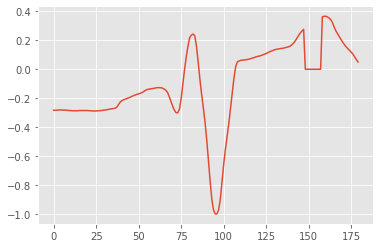

In [19]:
plt.plot(trainingData[1][0])
print(trainingData[1][0])
print(trainingData[1][1])

In [7]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv1d(1, 180, 5, padding=2) 
        self.conv2 = nn.Conv1d(180, 150, 5, padding=2) 
        self.conv3 = nn.Conv1d(150, 120, 5, padding=2)
        self.conv4 = nn.Conv1d(120, 90, 5, padding=2)
        self.conv5 = nn.Conv1d(90, 60, 5, padding=2)

        x = torch.randn(1,1,180).view(-1,1,180)
        self._to_linear = None
        self.convs(x)

        self.fc1 = nn.Linear(self._to_linear, 180)
        self.fc2 = nn.Linear(180, 4)

    def convs(self, x):
        x = F.max_pool1d(F.relu(self.conv1(x)), 3)
        x = F.max_pool1d(F.relu(self.conv2(x)), 3)
        x = F.max_pool1d(F.relu(self.conv3(x)), 2)
        x = F.max_pool1d(F.relu(self.conv4(x)), 3)
        x = F.max_pool1d(F.relu(self.conv5(x)), 3)

        if self._to_linear is None:
            self._to_linear = x[0].shape[0]*x[0].shape[1]
        return x

    def forward(self, x):
        x = self.convs(x)
        x = x.view(-1, self._to_linear)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


net = Net().to(device)
print(net)

Net(
  (conv1): Conv1d(1, 180, kernel_size=(5,), stride=(1,), padding=(2,))
  (conv2): Conv1d(180, 150, kernel_size=(5,), stride=(1,), padding=(2,))
  (conv3): Conv1d(150, 120, kernel_size=(5,), stride=(1,), padding=(2,))
  (conv4): Conv1d(120, 90, kernel_size=(5,), stride=(1,), padding=(2,))
  (conv5): Conv1d(90, 60, kernel_size=(5,), stride=(1,), padding=(2,))
  (fc1): Linear(in_features=60, out_features=180, bias=True)
  (fc2): Linear(in_features=180, out_features=4, bias=True)
)


In [8]:
import torch.optim as optim

#optimizer = optim.Adam(net.parameters(), lr = 0.001)#, weight_decay=1e-5)

X = [i[0] for i in trainingData]
y = [i[1] for i in trainingData]
 
VAL_PCT = 0.1
val_size = int(len(X)*VAL_PCT)
print(val_size)

6600


In [9]:
train_X = X[:-val_size]
train_y = y[:-val_size]

test_X = X[-val_size:]
test_y = y[-val_size:]

train_data = trainingData[:-val_size]

test_data = trainingData[-val_size:]

print(len(train_X), len(test_X))

59400 6600


In [10]:
 # insample accuracy & insample loss
 # outsample accuracy & outsample loss
import torch.nn as nn

def fwd_pass(X, y, train=False):
  if train:
    net.zero_grad()
  outputs = net(X)
  matches  = [torch.argmax(i)==torch.argmax(j) for i, j in zip(outputs, y)]
  acc = matches.count(True)/len(matches)
  loss_function = nn.CrossEntropyLoss().to(device)
  loss = loss_function(outputs, torch.argmax(y, 1))
  if train:
    loss.backward()
    optimizer.step()
  return acc, loss

def test(size=32):
    X, y = test_X[:size], test_y[:size]
    val_acc, val_loss = fwd_pass(torch.Tensor(X).view(-1, 1, 180).to(device), torch.Tensor(y).to(device))
    return val_acc, val_loss

def net_info(net):
  params = []
  for layers, m in enumerate(net.modules()):
    params.append(int(''.join(filter(lambda x: x.isdigit(),str((str(m).split(',')[1]))))))

  return layers, params

def weight_reset(m):
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
        m.reset_parameters()

val_acc, val_loss = test(size=100)
print(val_acc, val_loss)

0.26 tensor(1.3861, device='cuda:0', grad_fn=<NllLossBackward>)


In [11]:
import time

net = Net().apply(weight_reset).to(device)
optimizer = optim.Adam(net.parameters(), lr = 0.001)#, weight_decay=1e-5)
loss_function = nn.CrossEntropyLoss()#weight=1/torch.Tensor(list(Data_PreProcessing.dataCount.values())))

PATH = "/content/drive/My Drive/ECG_MODELS/"

layers, params = net_info(net)
MODEL_NAME = f"layers-{layers}_parms-{str(params)[1:-1].replace(', ', '_')}_model-{int(time.time())}"  # gives a dynamic model name, to just help with things getting messy over time.
EPOCHS = 100
def train(net):
    BATCH_SIZE = 5000

    with open(PATH+"data/"+f"{MODEL_NAME}.log", "a") as f:
        for epoch in tqdm(range(EPOCHS)):
            for i in range(0, len(train_X), BATCH_SIZE):
                batch_X = train_X[i:i+BATCH_SIZE]
                batch_y = train_y[i:i+BATCH_SIZE]

                for y in range(len(batch_X)):
                  y = int(y)
                  #ZOOM OUT
                  rnd = (np.random.randint(40)*2)+100
                  ecg = [0] * int((180-rnd)/2)
                  for x in signal.resample(batch_X[y], rnd):
                    ecg.append(x)
                  for _ in range(int((180-rnd)/2)):
                    ecg.append(0)

                  batch_X.append(ecg)
                  batch_y.append(batch_y[y])
                  
                  #ZOOM IN
                  ecg = []
                  rnd = (np.random.randint(32)*2)+180
                  diff_ecg = signal.resample(batch_X[y], rnd)
                  p1_ecg = diff_ecg[:len(diff_ecg/2)]
                  p1_ecg = p1_ecg[-90:]
                  p2_ecg = diff_ecg[len(diff_ecg/2):]
                  p2_ecg = p1_ecg[:91]
                  for x in p1_ecg:
                    ecg.append(x)
                  for x in p2_ecg:
                    ecg.append(x)

                  ecg = np.asarray(ecg)
                  ecg = ecg / np.amax(abs(ecg))  #ecg.append(signal.resample(ecgFile[0], rnd))

                  batch_X.append(ecg)
                  batch_y.append(batch_y[y])
  
                batch_X = torch.Tensor(batch_X).view(-1,1,180)
                batch_y = torch.Tensor(batch_y)
                batch_X, batch_y = batch_X.to(device), batch_y.to(device)

                acc, loss = fwd_pass(batch_X, batch_y, train=True)

                #print(f"Acc: {round(float(acc),2)}  Loss: {round(float(loss),4)}")
                #f.write(f"{MODEL_NAME},{round(time.time(),3)},train,{round(float(acc),2)},{round(float(loss),4)}\n")
                # just to show the above working, and then get out:
                
                if i % 50 == 0:
                    val_acc, val_loss = test(size=100)
                    f.write(f"{round(time.time(),3)},{round(float(acc),2)},{round(float(loss), 4)},{round(float(val_acc),2)},{round(float(val_loss),4)},{epoch}\n")
              
print(MODEL_NAME)
train(net)
torch.save(net, PATH+"model_params/"+f'{MODEL_NAME}.pt')

model_data = open(PATH+"model_data/"+f"{MODEL_NAME}.txt", "w")
model_data.write(str(net))
model_data.write("/n")
model_data.write(str(optimizer))
model_data.write("/n")
model_data.write(str(loss_function))
model_data.close()

layers-7_parms-180_180_150_120_90_60_180_4_model-1579735831


100%|██████████| 300/300 [3:28:00<00:00, 43.88s/it]
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Net. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Conv1d. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Linear. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


Best Valid Accuracy: 0.7


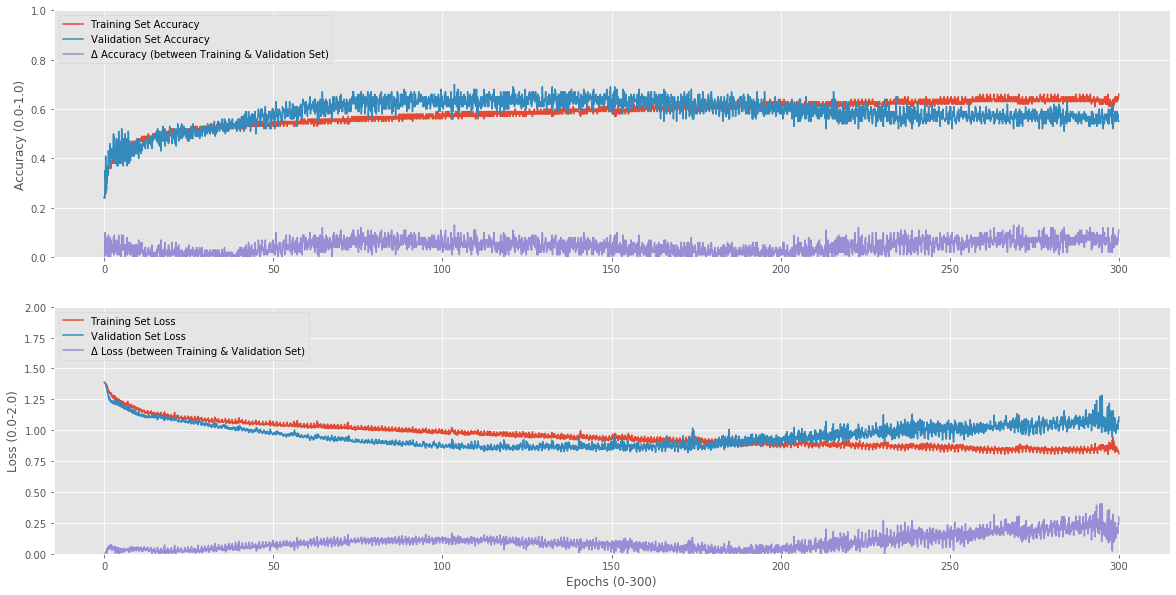

In [12]:
import matplotlib.pyplot as plt
from matplotlib import style

style.use("ggplot")
PATH = "/content/drive/My Drive/ECG_MODELS/"
def create_acc_loss_graph(model_name):
  contents = open(PATH+"data/"+f"{MODEL_NAME}.log", "r").read().split("\n")
  times = []
  accuracies = []
  losses = []
  mean_loss = []
  mean_acc = []
  val_accs = []
  val_losses = []
  
  contents = (c.split(",") for c in contents[:-1])
  for temp in list(contents):

    times.append(float(temp[0]))
    accuracies.append(float(temp[1]))
    losses.append(float(temp[2]))
    
    val_accs.append(float(temp[3]))
    val_losses.append(float(temp[4]))


  print("Best Valid Accuracy:", max(val_accs))
  times = (np.asarray(times) - min(times))
  times = times/np.amax(times)
  times = times * EPOCHS
  fig = plt.figure(figsize=(20, 10))
  ax1 = plt.subplot2grid((2,1), (0,0))
  ax2 = plt.subplot2grid((2,1), (1,0), sharex=ax1)

  ax1.set_ylim([0,1])
  ax1.set_ylabel('Accuracy (0.0-1.0)')
  ax1.plot(times, accuracies, label="Training Set Accuracy")
  ax1.plot(times, val_accs, label="Validation Set Accuracy")
  ax1.plot(times, abs(np.array(val_accs)-np.array(accuracies)), label="Δ Accuracy (between Training & Validation Set)")
  ax1.legend(loc=2)

  ax2.set_ylim([0,2])
  ax2.set_ylabel('Loss (0.0-2.0)')
  ax2.set_xlabel(f'Epochs (0-{EPOCHS})')
  ax2.plot(times, losses, label="Training Set Loss")
  ax2.plot(times, val_losses, label="Validation Set Loss")
  ax2.plot(times, abs(np.array(val_losses)-np.array(losses)), label="Δ Loss (between Training & Validation Set)")
  ax2.legend(loc=2)
  plt.savefig(PATH+"graphs/"+MODEL_NAME)
  plt.show()

create_acc_loss_graph(MODEL_NAME)